### 목표 : 다중 속성/피처를 기반으로 수치값 예측
- 데이터: fish.csv
- 피쳐 : 4개 Length, Diagonal, Height, Width
- 타겟 : 수치값 Weight
- 학습유형 : 지도학습 + 회귀
- 알고리즘 : 데이터를 확인 후 결정

(1) 모듈로딩 및 데이터 준비 <hr>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [4]:
# 데이터 준비
data_file = '../data/fish.csv'

# Bream 행만 추출 => 35개 행만 추출
dataDF = pd.read_csv(data_file, nrows=35, usecols=[1,2,3,4,5])

In [5]:
# 기본 정보
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    35 non-null     int64  
 1   Length    35 non-null     float64
 2   Diagonal  35 non-null     float64
 3   Height    35 non-null     float64
 4   Width     35 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


(2) 데이터 확인 <hr>

### *타겟과 피쳐 관계 => 상관계수, 시각화

In [15]:
# 피쳐와 타겟과의 관계 정도를 시각화 및 수치값으로 표기 핓 출력]
# 행수, 열수, 타겟, 피쳐리스트, 상관계수 값
# 반환 : 없음
def print_feature(nrows, ncols, df, target, features,corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target], df[features[idx]], label=f'corr:{corrs[idx]:.2}')
        plt.legend()
        plt.xlabel(target)
        plt.ylabel(features[idx])
    plt.tight_layout()
    plt.show()

In [16]:
corrList=dataDF.corr()['Weight'].to_list()
corrList[1:]

[0.9462561265460506, 0.947135878863793, 0.9645275374662504, 0.9253033105453]

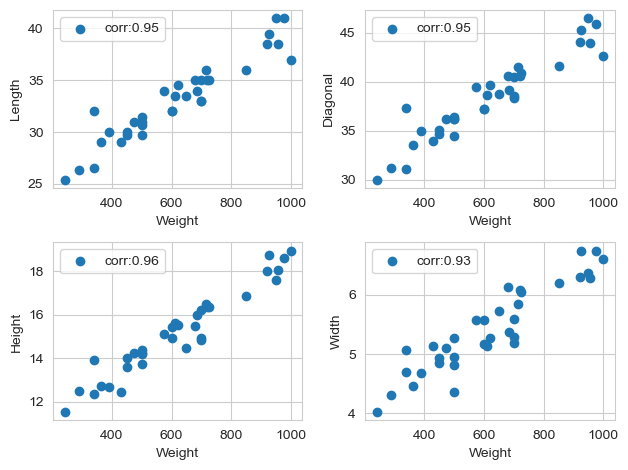

In [17]:
print_feature(2,2,dataDF,dataDF.columns[0],dataDF.columns[1:], corrList[1:])

(3) 학습 진행 <hr>
- 학습 알고리즘 : 양의 선형관계 파악됨 => 선형 모델
- 학습 데이터 준비 : 피쳐/타겟 분리, 학습용 데이터셋 - 테스트용 데이터셋
- 피쳐 값의 범위 비교 : 작은 범위 최대값 8 ~ 큰 범위 최대값 50 => 피쳐 스케일링

(3-1) 학습 데이터 분리 => 피쳐-타겟, 학습용 데이터셋 - 테스트용 데이터셋

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [20]:
# 피쳐와 타겟 분리
featureDF = dataDF[dataDF.columns[1:]]
featureDF.head(2)

,Length,Diagonal,Height,Width
0,25.4,30.0,11.52,4.0200
1,26.3,31.2,12.48,4.3056


In [21]:
targetDF = dataDF[dataDF.columns[0]]
targetDF.head(2)

0    242
1    290
Name: Weight, dtype: int64

In [22]:
# 데이터 셋 준비
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, random_state=17, test_size=0.3)

In [23]:
print(f'[훈련용] X_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'[훈련용] X_test: {x_test.shape}, y_test: {y_test.shape}')

[훈련용] X_train: (24, 4), y_train: (24,)
[훈련용] X_test: (11, 4), y_test: (11,)


(3-2) 피쳐 스케일링 ===> 훈련데이터로 생성해야함

In [24]:
std_scaler = StandardScaler()
std_scaler.fit(x_train) 

StandardScaler()

In [26]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(x_train)

MinMaxScaler()

In [27]:
rb_scaler = RobustScaler()
rb_scaler.fit(x_train)

RobustScaler()

In [33]:
# 3가지 버전에 스케일된 데이터셋 준비
x_train_std=std_scaler.transform(x_train)
x_test_std=std_scaler.transform(x_test)

x_train_mm=mm_scaler.transform(x_train)
x_test_mm=mm_scaler.transform(x_test)

x_train_rb=rb_scaler.transform(x_train)
x_test_rb=rb_scaler.transform(x_test)

(4) 학습 진행 <hr>

In [34]:
from sklearn.linear_model import LinearRegression


In [35]:
model = LinearRegression()
model.fit(x_train_std, y_train)

print(f'[모델파라미터] ====>\ncoef_ : {model.coef_}\nintercept_ : {model.intercept_}')

[모델파라미터] ====>
coef_ : [ 99.93637503 -55.28705991 141.75255853  13.76152123]
intercept_ : 600.1249999999999


(5) 모델 평가 <hr>
- 훈련용 데이터셋의 점수와 테스트 데이터셋 잠수 비교
    * 훈련 점수 > 테스트 점수 : 과대적합
    * 훈련 점수 낮음, 테스트점수 낮음 : 과소적합
    * 훈련 점수 ≒ 테스트 점수 : 최적적합

In [36]:
train_score = model.score(x_train_std, y_train)
test_score = model.score(x_test_std, y_test)

print(f'Train Score : {train_score} --- Test Score : {test_score}')

Train Score : 0.9293616707605552 --- Test Score : 0.9632646976853005


In [44]:
def three_scaler(train, test):
            std_scaler = StandardScaler()
            std_scaler.fit(train)
            std_train = std_scaler.transform(train)
            std_test = std_scaler.transform(test)
            mm_scaler = MinMaxScaler()
            mm_scaler.fit(train)
            mm_train = mm_scaler.transform(train)
            mm_test = mm_scaler.transform(test)
            rb_scaler = RobustScaler()
            rb_scaler.fit(train)
            rb_train = rb_scaler.transform(train)
            rb_test = rb_scaler.transform(test)
            return std_train,std_test,mm_train,mm_test,rb_train,rb_test

In [83]:
def best_model(x_train, y_train, x_test, y_test):
    x_train_std, x_test_std, x_train_mm, x_test_mm, x_train_rb, x_test_rb = three_scaler(x_train,x_test)
    
    
    def make_score (x_train_model, x_test_model):
        model = LinearRegression()
        model.fit(x_train_model, y_train)
        train_score = model.score(x_train_model, y_train)
        test_score = model.score(x_test_model, y_test)
        plt.plot(x_train_model[:,0], y_train, 'bo', label='Train Score')
        plt.plot(x_test_model[:,0], y_test, 'ro', label='Test Score')
        plt.legend()
        plt.show()
        
        return train_score, test_score
    
    
    train_score, test_score=make_score(x_train_std, x_test_std)
    print(f'StandardScaler - Train Score : {train_score} --- Test Score : {test_score}')
    
    train_score, test_score=make_score(x_train_mm, x_test_mm)
    print(f'MinMaxScaler - Train Score : {train_score} --- Test Score : {test_score}')
    
    train_score, test_score=make_score(x_train_rb, x_test_rb)
    print(f'RobustScaler - Train Score : {train_score} --- Test Score : {test_score}')

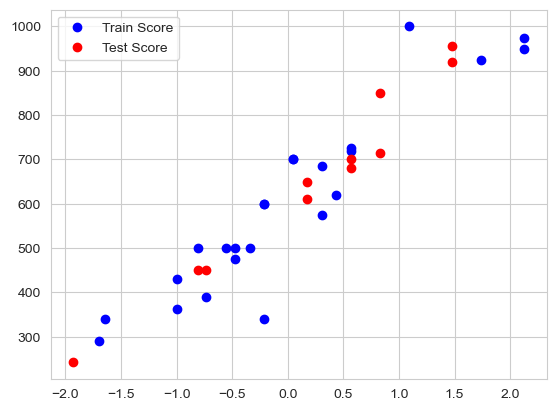

StandardScaler - Train Score : 0.9293616707605552 --- Test Score : 0.9632646976853005


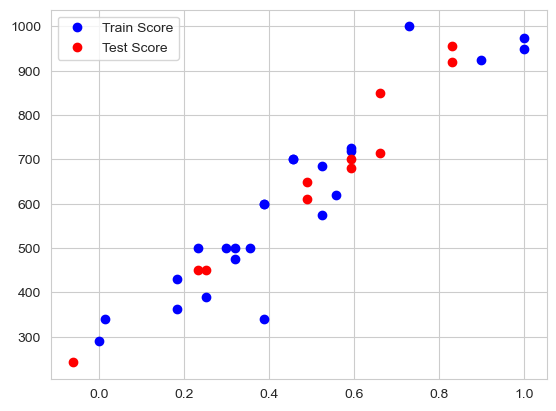

MinMaxScaler - Train Score : 0.9293616707605552 --- Test Score : 0.9632646976853002


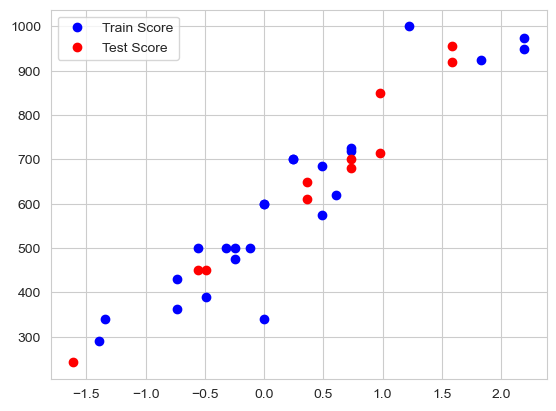

RobustScaler - Train Score : 0.9293616707605552 --- Test Score : 0.9632646976853004


In [84]:
best_model(x_train, y_train, x_test, y_test)

In [61]:
y_train.shape

(24,)

In [76]:
x_train_std[:,0]

array([ 1.0861704 ,  0.30646682, -0.47323675,  2.12577517,  2.12577517,
       -0.99303914, -1.64279212, -0.47323675, -0.55120711,  0.04656563,
       -0.21333556, -1.69477236,  0.56636801, -0.34328616,  0.30646682,
       -0.73313795, -0.99303914,  1.73592338, -0.21333556,  0.04656563,
        0.56636801,  0.43641742, -0.8111083 , -0.21333556])

In [42]:
model1 = LinearRegression()
model1.fit(x_train_mm, y_train)
model2 = LinearRegression()
model2.fit(x_train_rb, y_train)

LinearRegression()

In [43]:
train_score_std = model.score(x_train_std, y_train)
test_score_std = model.score(x_test_std, y_test)
train_score_mm = model1.score(x_train_mm, y_train)
test_score_mm = model1.score(x_test_mm, y_test)
train_score_rb = model2.score(x_train_rb, y_train)
test_score_rb = model2.score(x_test_rb, y_test)

print(f'StandardScaler - Train Score : {train_score_std} --- Test Score : {test_score_std}')
print(f'MinMaxScaler - Train Score : {train_score_mm} --- Test Score : {test_score_mm}')
print(f'RobusterScaler - Train Score : {train_score_rb} --- Test Score : {test_score_rb}')

StandardScaler - Train Score : 0.9293616707605552 --- Test Score : 0.9632646976853005
MinMaxScaler - Train Score : 0.9293616707605552 --- Test Score : 0.9632646976853002
RobusterScaler - Train Score : 0.9293616707605552 --- Test Score : 0.9632646976853004


In [85]:
# StandardScaler : 평균:0, 편차:1

# MinMaxScaler : 최소:0, 최대:1

# RobusterScaler : 중앙값:0, IQR :1, Value-Median /IQR
    # standard 가 이상치에 영향을 많이 받으므로 중앙을 기준으로 자른다